In [33]:
import torch as t
import torch_geometric as pyg
import dgl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
dataset = dgl.data.BAShapeDataset()

Done loading data from cached files.


In [3]:
dataset[0].ndata["label"]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2,
        3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3,
        1, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 1, 2, 3, 1, 3, 1, 2, 3, 2, 2, 1, 2, 3,
        1, 2, 3, 1, 2, 3, 1, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 2, 3, 1,
        2, 3, 2, 1, 2, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 3,
        1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3,
        1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 2, 1, 1, 2, 3, 1, 2,
        3, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 2,
        3, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 2, 1,
        2, 3, 2, 1, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1,
        1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1,

In [4]:
dataset[0].ndata["feat"]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [5]:
src, dst = dataset[0].edges()
edge_index = t.stack([src, dst], dim=0)
x = dataset[0].ndata["feat"]
labels = dataset[0].ndata["label"]

In [6]:
edge_index

tensor([[ 47,  56,  61,  ..., 695, 697, 699],
        [  0,   1,   2,  ..., 697, 698, 698]])

In [7]:
sgc1 = pyg.nn.SGConv(
    in_channels = 1,
    out_channels = 1,
    K = 1
)

sgc5 = pyg.nn.SGConv(
    in_channels = 1,
    out_channels = 1,
    K = 3
)

sgc1_out = sgc1.forward(x, edge_index).detach().numpy()
sgc5_out = sgc5.forward(x, edge_index).detach().numpy()

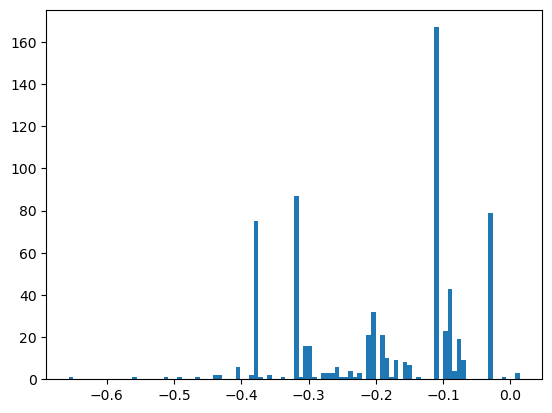

In [9]:
plt.hist(sgc1_out, bins=100);

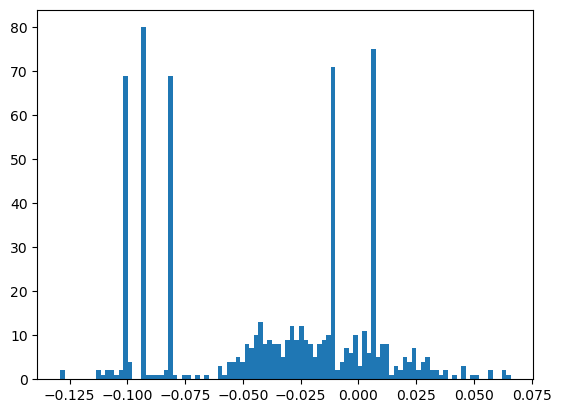

In [10]:
plt.hist(sgc5_out, bins=100);

In [11]:
label_set = set()
for label in list(labels):
    label_set.add(label.item())
print(label_set)

{0, 1, 2, 3}


In [14]:
def hist_by_label(sgc_out, bins=100):
    data = []
    data_label = []
    for label in label_set:
        data.append(sgc_out[label==labels].reshape(-1))
        data_label.append(str(label))
    plt.hist(data, label=data_label, histtype="barstacked", bins=bins)
    plt.legend()
    plt.title("X value by label")
    plt.show()

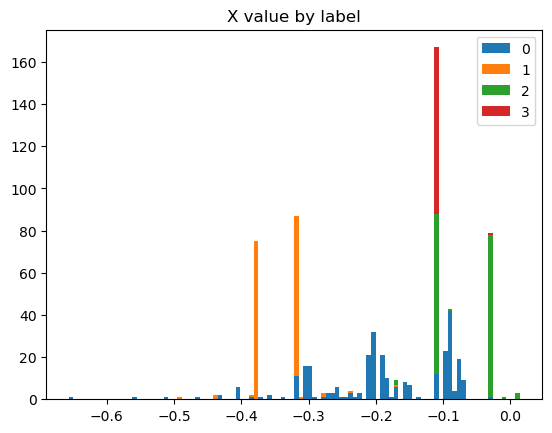

In [15]:
hist_by_label(sgc1_out)

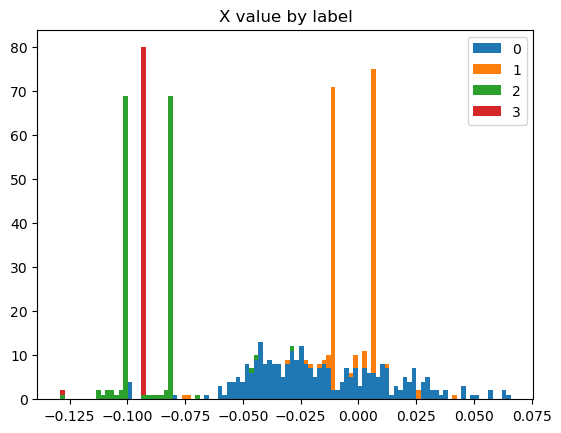

In [16]:
hist_by_label(sgc5_out);

In [17]:
clusterer = KMeans(4)

In [65]:
k1_clusters = clusterer.fit_predict(sgc1_out)
k5_clusters = clusterer.fit_predict(sgc5_out)
k1_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       3, 2, 3, 2, 2, 0, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 1, 3, 2,
       2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 1, 1, 3, 2, 2, 1, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2,
       1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 2, 2, 1, 1, 1,

In [66]:
def plot_confusion_matrix(labels_true, labels_pred):
    matrix = confusion_matrix(labels_true, labels_pred)
    plt.imshow(matrix / np.expand_dims(matrix.sum(1), 1), cmap="hot")

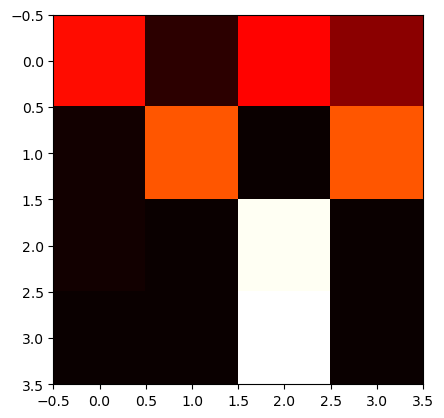

In [67]:
plot_confusion_matrix(labels, k1_clusters)

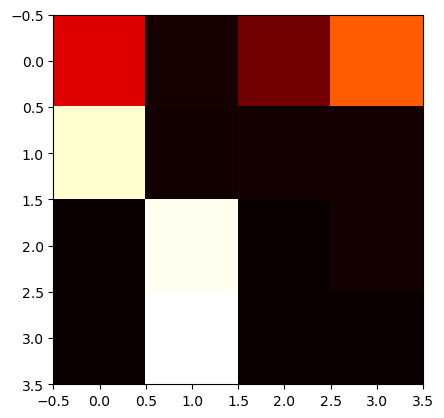

In [68]:
plot_confusion_matrix(labels, k5_clusters)